In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
data=pd.read_csv("finaldata.csv")

In [2]:
data=data.drop(["Unnamed: 0","Unnamed: 0.1"],1)

In [3]:
data=data.drop(list(data.index[data.RESIDENTIAL!=1]))

In [4]:
data=data.drop(["RESIDENTIAL",'MIXED_USE','COMMERCIAL_BUILDINGS', 'INDUSTRIAL_BUILDINGS',
       'VACANT_LOTS', 'CIVIC_USE', 'GOVERNMENT_BLDG'],1)

[0, 10000000.0, 0, 3500]

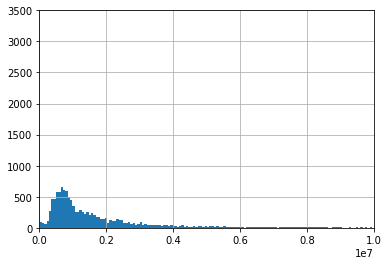

In [238]:
data["SALE PRICE"].hist(bins=6000)
plt.axis([0,1e7, 0, 3500])

In [250]:
data[data['LAND SQUARE FEET STAN']==0]['LAND SQUARE FEET STAN']
# .hist(bins=100)
# plt.axis([0,0.1, 0, 12000])

Series([], Name: LAND SQUARE FEET STAN, dtype: float64)

In [5]:
data=data[data["SALE PRICE"]<40000000]

In [6]:
data=data[data["SALE PRICE"]!=30792]

In [8]:
data.columns

Index(['SALE PRICE', 'latitude', 'longitude', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'TAX CLASS = 1', 'TAX CLASS = 2',
       'One Family Dwellings', 'Two Family Dwellings', 'Walk Up Apartments',
       'Elevator Apartments', 'Condominiums', 'Apt Floor_mv', 'Apt Floor STAN',
       'LAND SQUARE FEET_mv', 'LAND SQUARE FEET STAN', 'BUILD_YEAR(1800-1900)',
       'BUILD_YEAR(1900-2000)', 'BUILD_YEAR(2000-2019)'],
      dtype='object')

In [164]:
np.random.seed(1352)
shuffled_data = data.loc[np.random.permutation(data.index), :]

In [165]:
# n_train = 0.7*len(data)
# n_valid = 0.2*len(data)
n_train = int(0.85*len(data))
n_test = int(0.15*len(data))

In [166]:
X_train, y_train = shuffled_data.iloc[:n_train, :].drop(['SALE PRICE'], axis=1), shuffled_data.iloc[:n_train]['SALE PRICE']
X_test, y_test = shuffled_data.iloc[n_train:, :].drop(['SALE PRICE'], axis=1), shuffled_data.iloc[n_train:]['SALE PRICE']

In [167]:
shuffled_data.head()

,SALE PRICE,latitude,longitude,month_1,month_2,month_3,month_4,month_5,month_6,month_7,...,Walk Up Apartments,Elevator Apartments,Condominiums,Apt Floor_mv,Apt Floor STAN,LAND SQUARE FEET_mv,LAND SQUARE FEET STAN,BUILD_YEAR(1800-1900),BUILD_YEAR(1900-2000),BUILD_YEAR(2000-2019)
5611,615000,40.753515,-73.967769,0,0,0,0,0,0,0,...,0,0,1,0,0.022727,1,0.015092,0,1,0
9627,1850000,40.785621,-73.954649,0,0,0,0,0,0,0,...,0,0,1,0,0.113636,1,0.015092,0,1,0
6660,975000,40.750041,-73.980008,0,0,0,0,0,0,0,...,0,0,1,0,0.045455,1,0.015092,0,0,0
9353,710000,40.775774,-73.951415,0,0,0,0,0,0,0,...,0,1,0,0,0.022727,1,0.015092,0,1,0
1632,750000,40.738465,-73.994878,0,0,0,0,0,0,0,...,1,0,0,0,0.022727,1,0.015092,0,1,0


In [168]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
y_test_lr =lr.predict(X_test)
r2_score(y_test, y_test_lr)

0.3070265671947493

Text(0.5,1,'Prediction V.S Actual')

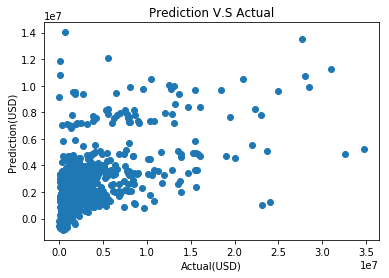

In [169]:
%matplotlib inline
plt.scatter(y_test, y_test_lr)
plt.xlabel("Actual(USD)")
plt.ylabel("Prediction(USD)")
plt.title("Prediction V.S Actual")

In [170]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_lr)

7376876037644.5625

In [171]:
np.argmax(y_test)

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


4780

In [172]:
np.argmax(y_test_lr)

469

In [173]:
np.max(y_test)

34750000

In [174]:
y_test_lr

array([3211209.14997077, 1811366.93042302, 2949707.20493817, ...,
       -277155.41445446,  658580.34115577, 1088864.29068446])

In [175]:
lrinter = LinearRegression(fit_intercept=False)
lrinter.fit(X_train, y_train)
y_test_lrinter =lrinter.predict(X_test)
r2_score(y_test, y_test_lrinter)

0.3070265671947391

In [177]:
# svm
from sklearn import svm
vm=svm.SVR(kernel='linear')
vm.fit(X_train, y_train)
y_test_vm =vm.predict(X_test)
r2_score(y_test, y_test_vm)

-0.09118643648568803

In [192]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=2)
dtr.fit(X_train, y_train)
y_test_dtr =dtr.predict(X_test)
y_train_dtr=dtr.predict(X_train)
print(r2_score(y_test, y_test_dtr),r2_score(y_train, y_train_dtr))

0.26348241364170877 0.20678819550026606


In [193]:
dtr=DecisionTreeRegressor(max_depth=3)
dtr.fit(X_train, y_train)
y_test_dtr =dtr.predict(X_test)
y_train_dtr=dtr.predict(X_train)
print(r2_score(y_test, y_test_dtr),r2_score(y_train, y_train_dtr))

0.34895110063210644 0.2639952883336001


In [194]:
dtr=DecisionTreeRegressor(max_depth=4)
dtr.fit(X_train, y_train)
y_test_dtr =dtr.predict(X_test)
y_train_dtr=dtr.predict(X_train)
print(r2_score(y_test, y_test_dtr),r2_score(y_train, y_train_dtr))

0.40103502403194136 0.3287450421676875


In [195]:
dtr=DecisionTreeRegressor(max_depth=5)
dtr.fit(X_train, y_train)
y_test_dtr =dtr.predict(X_test)
y_train_dtr=dtr.predict(X_train)
print(r2_score(y_test, y_test_dtr),r2_score(y_train, y_train_dtr))

0.4388503937439302 0.36882116525157593


In [196]:
dtr=DecisionTreeRegressor(max_depth=6)
dtr.fit(X_train, y_train)
y_test_dtr =dtr.predict(X_test)
y_train_dtr=dtr.predict(X_train)
print(r2_score(y_test, y_test_dtr),r2_score(y_train, y_train_dtr))

0.4637179993516255 0.42123275654205194


In [197]:
dtr=DecisionTreeRegressor(max_depth=7)
dtr.fit(X_train, y_train)
y_test_dtr =dtr.predict(X_test)
y_train_dtr=dtr.predict(X_train)
print(r2_score(y_test, y_test_dtr),r2_score(y_train, y_train_dtr))

0.5088442638129126 0.48810971936431613


In [198]:
# best!!!!!!
dtr=DecisionTreeRegressor(max_depth=8)
dtr.fit(X_train, y_train)
y_test_dtr =dtr.predict(X_test)
y_train_dtr=dtr.predict(X_train)
print(r2_score(y_test, y_test_dtr),r2_score(y_train, y_train_dtr))

0.5120736484763012 0.5425298676479146


In [199]:
dtr=DecisionTreeRegressor(max_depth=9)
dtr.fit(X_train, y_train)
y_test_dtr =dtr.predict(X_test)
y_train_dtr=dtr.predict(X_train)
print(r2_score(y_test, y_test_dtr),r2_score(y_train, y_train_dtr))

0.5166067831897446 0.6026729071325301


In [200]:
dtr=DecisionTreeRegressor(max_depth=10)
dtr.fit(X_train, y_train)
y_test_dtr =dtr.predict(X_test)
y_train_dtr=dtr.predict(X_train)
print(r2_score(y_test, y_test_dtr),r2_score(y_train, y_train_dtr))

0.4793343657130209 0.662790855102738


In [202]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_test_rf=rf.predict(X_test)
y_train_rf=rf.predict(X_train)
print(r2_score(y_test, y_test_rf),r2_score(y_train, y_train_rf))

0.6049014755562565 0.8741868076852102


In [181]:
mean_squared_error(y_test, y_test_rf)

4174509714508.964

In [204]:
rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [219]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
#Use Kfold to create 4 folds
X= shuffled_data.drop(['SALE PRICE'], axis=1)
Y= shuffled_data['SALE PRICE']
kfolds = KFold(n_splits = 4)
param_grid_rf = {'max_depth': [3*i for i in range(3, 9)],
                 "min_samples_leaf":[i for i in range(2,100,10)]}
lr_grid_search = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv = kfolds, scoring = 'r2') 
lr_grid_search.fit(X, Y)
best_1 = lr_grid_search.best_score_
print(best_1)

0.48737273291033856


In [220]:
best=lr_grid_search.best_estimator_
best

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=18,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [221]:
best.fit(X_train,y_train)
y_test_rf=best.predict(X_test)
y_train_rf=best.predict(X_train)
print(r2_score(y_test, y_test_rf),r2_score(y_train, y_train_rf))

0.6371272905883718 0.7921606458969465


In [222]:
param_grid_rf = {'max_depth': [3*i for i in range(3, 9)],
                 "min_samples_split":[i for i in range(2,100,10)]}
lr_grid_search = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv = kfolds, scoring = 'r2') 
lr_grid_search.fit(X, Y)
best_1 = lr_grid_search.best_score_
print(best_1)

0.48755101761260206


In [223]:
best=lr_grid_search.best_estimator_
best

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [224]:
best.fit(X_train,y_train)
y_test_rf=best.predict(X_test)
y_train_rf=best.predict(X_train)
print(r2_score(y_test, y_test_rf),r2_score(y_train, y_train_rf))

0.6149340263416636 0.8320042220937452


In [225]:
param_grid_rf = {'max_depth': [3*i for i in range(3, 9)],
                 "min_samples_leaf":[2],
                "n_estimators":[i for i in range(10,100,10)]}
lr_grid_search = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv = kfolds, scoring = 'r2') 
lr_grid_search.fit(X, Y)
best_1 = lr_grid_search.best_score_
print(best_1)

0.5113159063692287


In [226]:
best=lr_grid_search.best_estimator_
best

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=21,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [227]:
best.fit(X_train,y_train)
y_test_rf=best.predict(X_test)
y_train_rf=best.predict(X_train)
print(r2_score(y_test, y_test_rf),r2_score(y_train, y_train_rf))

0.657578471040731 0.809559313949072
